In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from cv2 import imread
%matplotlib inline
sns.set()

In [3]:
train_labels = pd.read_csv("/media/jun/data/protein/train.csv")
train_labels.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [4]:
train_labels.shape[0]

31072

In [5]:
label_names = {
    0:  "Nucleoplasm",  
    1:  "Nuclear membrane",   
    2:  "Nucleoli",   
    3:  "Nucleoli fibrillar center",   
    4:  "Nuclear speckles",
    5:  "Nuclear bodies",   
    6:  "Endoplasmic reticulum",   
    7:  "Golgi apparatus",   
    8:  "Peroxisomes",   
    9:  "Endosomes",   
    10:  "Lysosomes",   
    11:  "Intermediate filaments",   
    12:  "Actin filaments",   
    13:  "Focal adhesion sites",   
    14:  "Microtubules",   
    15:  "Microtubule ends",   
    16:  "Cytokinetic bridge",   
    17:  "Mitotic spindle",   
    18:  "Microtubule organizing center",   
    19:  "Centrosome",   
    20:  "Lipid droplets",   
    21:  "Plasma membrane",   
    22:  "Cell junctions",   
    23:  "Mitochondria",   
    24:  "Aggresome",   
    25:  "Cytosol",   
    26:  "Cytoplasmic bodies",   
    27:  "Rods & rings"
}

reverse_train_labels = dict((v,k) for k,v in label_names.items())

def fill_targets(row):
    row.Target = np.array(row.Target.split(" ")).astype(np.int)
    for num in row.Target:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

In [6]:
for key in label_names.keys():
    train_labels[label_names[key]] = 0

In [7]:
train_labels = train_labels.apply(fill_targets, axis=1)
train_labels.head()

,Id,Target,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]",1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18],0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


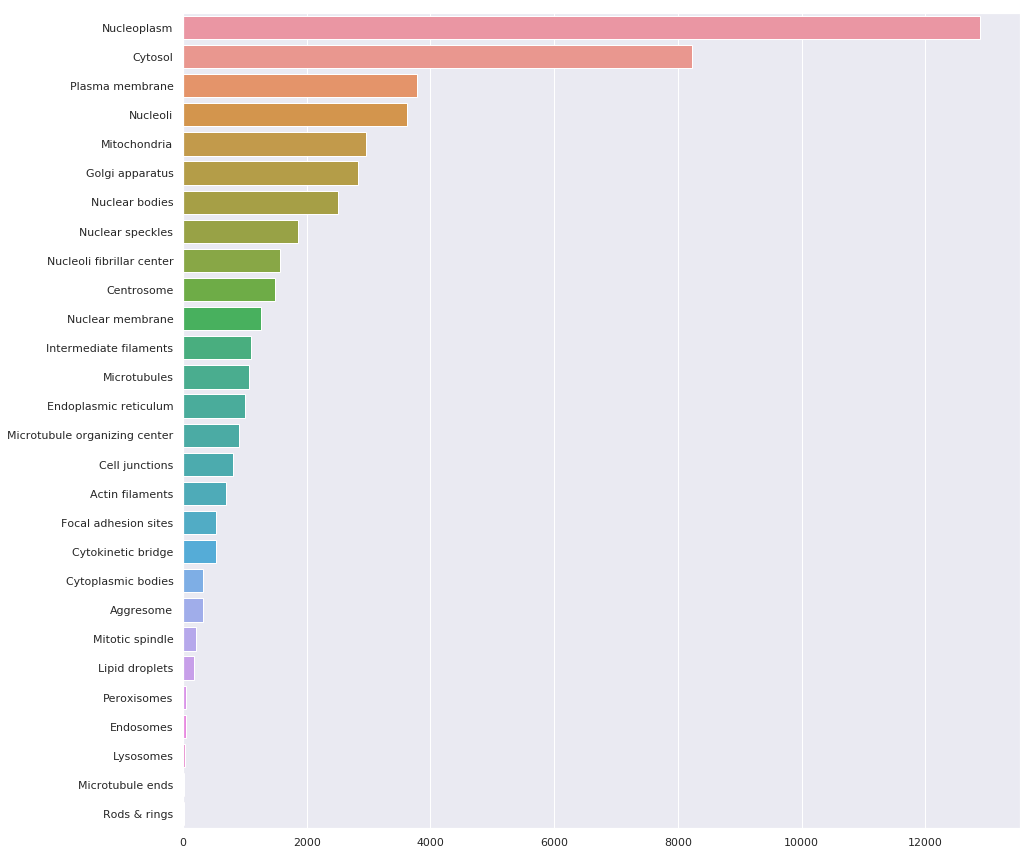

In [8]:
target_counts = train_labels.drop(["Id", "Target"],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)

## How many targets are most common?

Text(0, 0.5, '% of data')

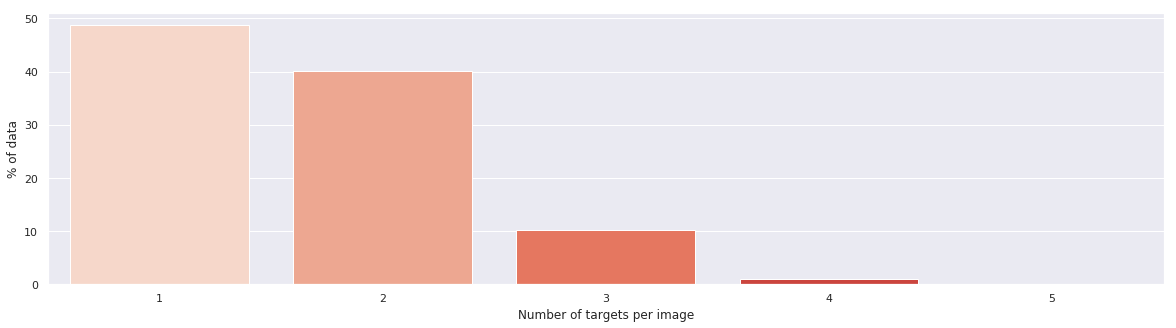

In [9]:
train_labels["number_of_targets"] = train_labels.drop(["Id", "Target"],axis=1).sum(axis=1)
count_perc = np.round(100 * train_labels["number_of_targets"].value_counts() / train_labels.shape[0], 2)
plt.figure(figsize=(20,5))
sns.barplot(x=count_perc.index.values, y=count_perc.values, palette="Reds")
plt.xlabel("Number of targets per image")
plt.ylabel("% of data")

## Which targets are correlated?

Let's see if we find some correlations between our targets. This way we may already see that some proteins often come together.

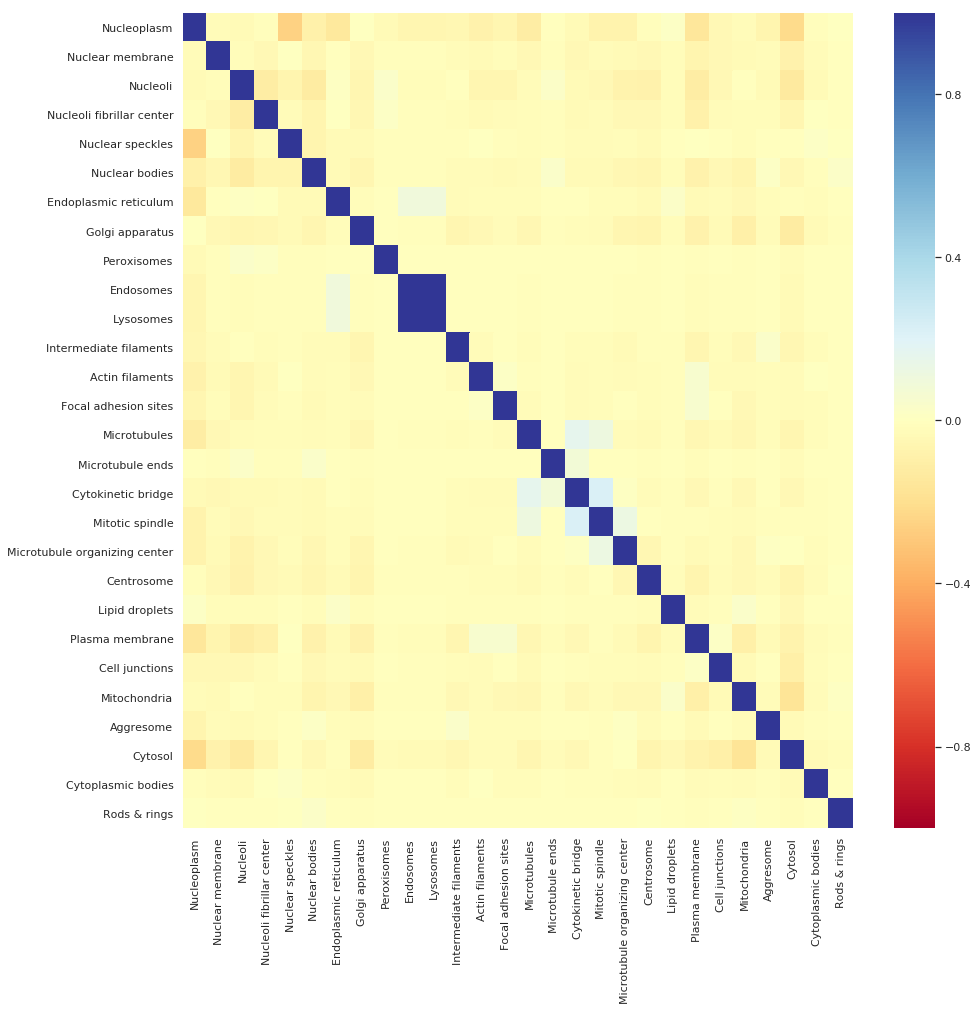

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(train_labels[train_labels.number_of_targets>1].drop(
    ["Id", "Target", "number_of_targets"],axis=1
).corr(), cmap="RdYlBu", vmin=-1, vmax=1)

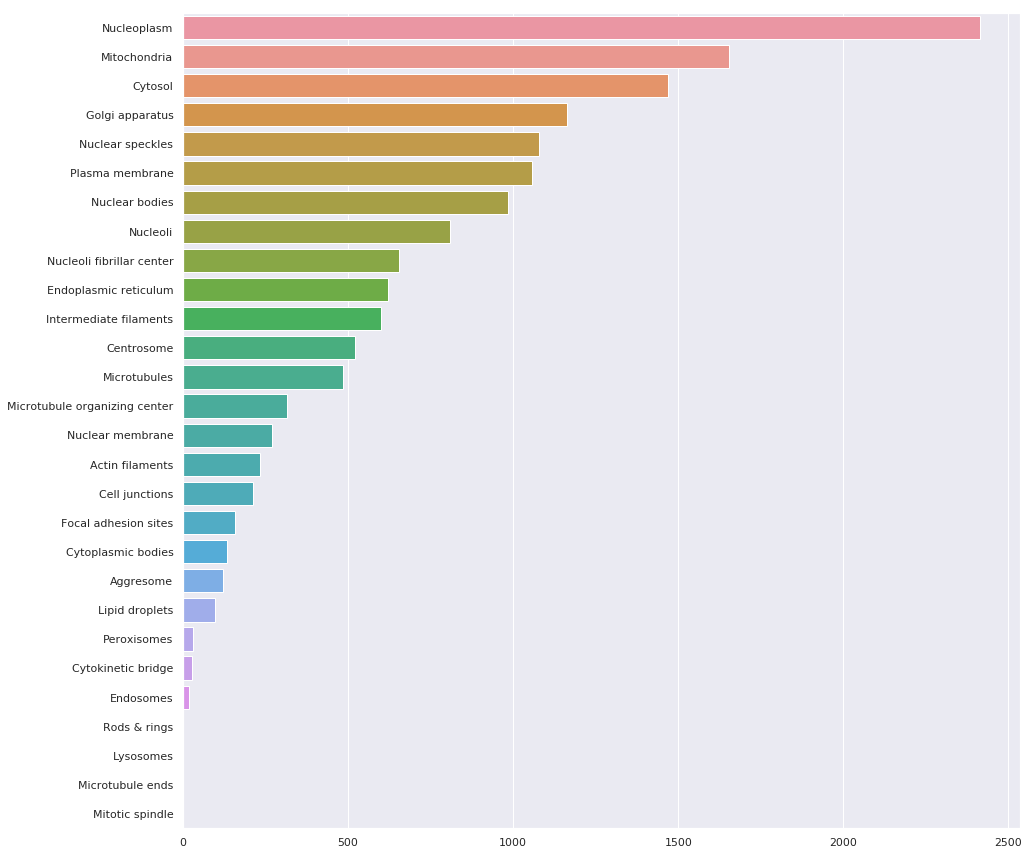

In [11]:
single_target_counts = train_labels[train_labels.number_of_targets==1].drop(
    ["Id", "Target", "number_of_targets"], axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=single_target_counts.index.values, x=single_target_counts.values, order=single_target_counts.index)

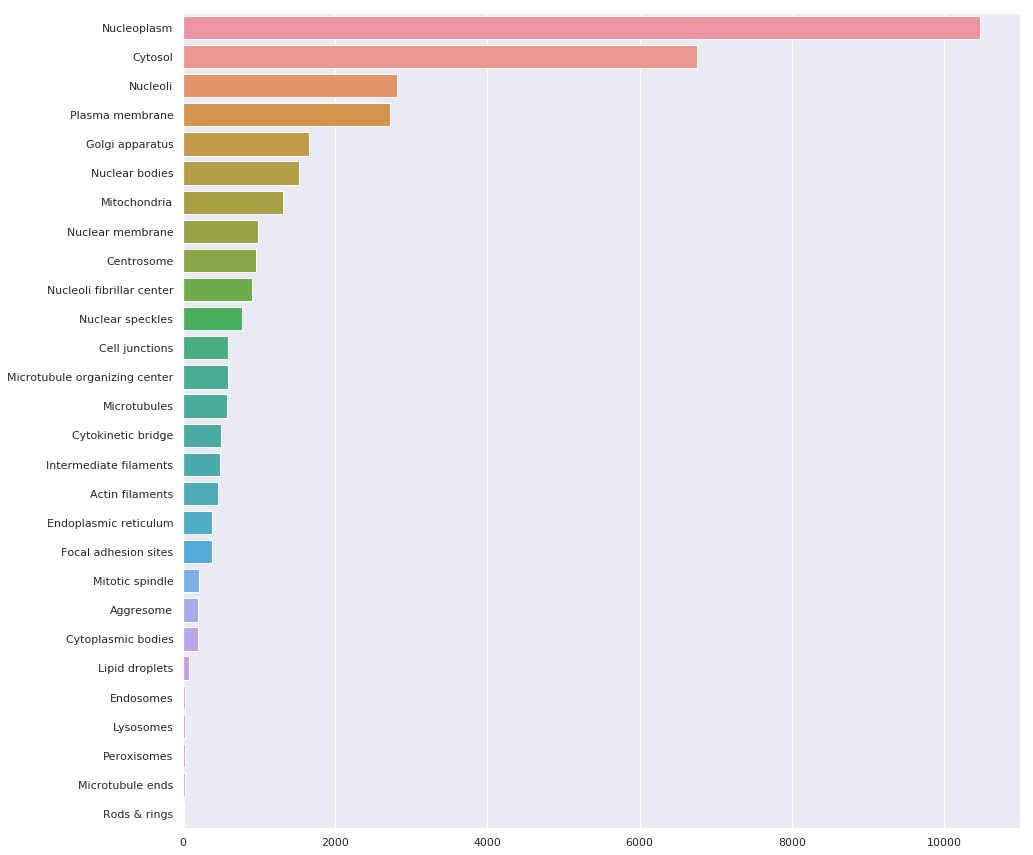

In [60]:
multi_target_counts = train_labels[train_labels.number_of_targets>1].drop(
    ["Id", "Target", "number_of_targets"], axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=multi_target_counts.index.values, x=multi_target_counts.values, order=multi_target_counts.index)

In [113]:
multi_target_counts

Nucleoplasm                      10471
Cytosol                           6758
Nucleoli                          2813
Plasma membrane                   2719
Golgi apparatus                   1659
Nuclear bodies                    1530
Mitochondria                      1312
Nuclear membrane                   983
Centrosome                         960
Nucleoli fibrillar center          907
Nuclear speckles                   781
Cell junctions                     589
Microtubule organizing center      588
Microtubules                       582
Cytokinetic bridge                 503
Intermediate filaments             492
Actin filaments                    456
Endoplasmic reticulum              386
Focal adhesion sites               380
Mitotic spindle                    210
Aggresome                          200
Cytoplasmic bodies                 194
Lipid droplets                      74
Endosomes                           28
Lysosomes                           28
Peroxisomes              

In [12]:
single_target_counts

Nucleoplasm                      2414
Mitochondria                     1653
Cytosol                          1470
Golgi apparatus                  1163
Nuclear speckles                 1077
Plasma membrane                  1058
Nuclear bodies                    983
Nucleoli                          808
Nucleoli fibrillar center         654
Endoplasmic reticulum             622
Intermediate filaments            601
Centrosome                        522
Microtubules                      484
Microtubule organizing center     314
Nuclear membrane                  271
Actin filaments                   232
Cell junctions                    213
Focal adhesion sites              157
Cytoplasmic bodies                134
Aggresome                         122
Lipid droplets                     98
Peroxisomes                        31
Cytokinetic bridge                 27
Endosomes                          17
Rods & rings                        1
Lysosomes                           0
Microtubule 

In [13]:
target_counts

Nucleoplasm                      12885
Cytosol                           8228
Plasma membrane                   3777
Nucleoli                          3621
Mitochondria                      2965
Golgi apparatus                   2822
Nuclear bodies                    2513
Nuclear speckles                  1858
Nucleoli fibrillar center         1561
Centrosome                        1482
Nuclear membrane                  1254
Intermediate filaments            1093
Microtubules                      1066
Endoplasmic reticulum             1008
Microtubule organizing center      902
Cell junctions                     802
Actin filaments                    688
Focal adhesion sites               537
Cytokinetic bridge                 530
Cytoplasmic bodies                 328
Aggresome                          322
Mitotic spindle                    210
Lipid droplets                     172
Peroxisomes                         53
Endosomes                           45
Lysosomes                

## Data augmentation test 1

In [114]:
#new_data = train_labels[train_labels.number_of_targets>1].drop(["Id", "Target", "number_of_targets"], axis=1)
new_data = train_labels.drop(["Id", "Target", "number_of_targets"], axis=1)
new_data.head()

,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,Peroxisomes,Endosomes,...,Microtubule organizing center,Centrosome,Lipid droplets,Plasma membrane,Cell junctions,Mitochondria,Aggresome,Cytosol,Cytoplasmic bodies,Rods & rings
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [115]:
class_counts = new_data.sum(axis=0).sort_values(ascending=False)
num_samples = new_data.shape[0]

In [116]:
def add_mount(row, add_num, ob_name):
    if row[ob_name] == 1:
        for i in label_names.keys():
            name = label_names[i]
            if row[name] > 0:
                row[name] += add_num
    return row

In [117]:
ob_names=[]

Centrosome
object num: 1378
auged num: 524
add num: 1
num_samples 60751


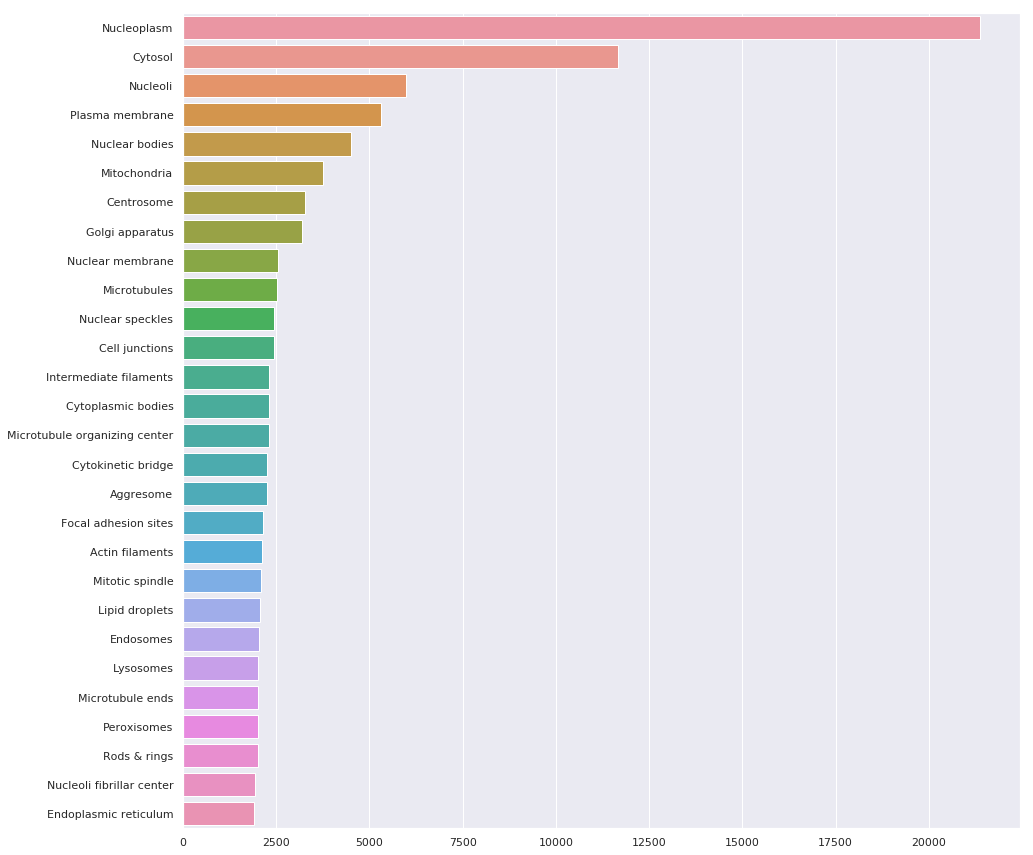

In [138]:
ob_name = class_counts.keys()[-1]
ob_names.append(ob_name)
ob_counts = new_data[new_data[ob_name]==1].sum(axis=0)[ob_name]
auged_counts = new_data[new_data[ob_name]>1].sum(axis=0)[ob_name]
add_num = int((2000-auged_counts)/ob_counts)
print(ob_name)
print('object num:', ob_counts)
print('auged num:', auged_counts)
print('add num:', add_num)
new_data = new_data.apply(lambda row: add_mount(row, add_num, ob_name), axis=1)
class_counts = new_data.sum(axis=0).sort_values(ascending=False)
num_samples += (2000-auged_counts)
print('num_samples', num_samples)
plt.figure(figsize=(15,15))
sns.barplot(y=class_counts.index.values, x=class_counts.values, order=class_counts.index)

In [136]:
class_counts

Nucleoplasm                      20797
Cytosol                          11404
Nucleoli                          5932
Plasma membrane                   5237
Nuclear bodies                    4470
Mitochondria                      3730
Golgi apparatus                   3178
Nuclear membrane                  2555
Microtubules                      2518
Cell junctions                    2444
Nuclear speckles                  2437
Intermediate filaments            2306
Cytoplasmic bodies                2296
Microtubule organizing center     2295
Aggresome                         2254
Cytokinetic bridge                2243
Focal adhesion sites              2148
Actin filaments                   2110
Mitotic spindle                   2100
Lipid droplets                    2064
Endosomes                         2033
Lysosomes                         2016
Microtubule ends                  2016
Peroxisomes                       2014
Rods & rings                      2002
Nucleoli fibrillar center

In [137]:
ob_names

['Rods & rings',
 'Microtubule ends',
 'Lysosomes',
 'Peroxisomes',
 'Lipid droplets',
 'Mitotic spindle',
 'Aggresome',
 'Cytoplasmic bodies',
 'Focal adhesion sites',
 'Actin filaments',
 'Cell junctions',
 'Intermediate filaments',
 'Nuclear membrane',
 'Microtubule organizing center',
 'Microtubules']

## Data augmentation test 2

In [16]:
def find_counts(special_target, labels):
    new_labels = labels[labels[special_target] == 0].drop([special_target],axis=1)
    counts = new_labels.sum(axis=0)
    counts = counts.sort_values(ascending=False)
    return new_labels, counts

In [17]:
new_counts = {}
new_labels = train_labels.drop(
        ["Id", "Target", "number_of_targets"],axis=1)

In [45]:
special_target = target_counts.keys()[-1]
new_counts[special_target] = target_counts[-1]
new_labels, target_counts = find_counts(special_target, new_labels)
print(new_counts)
plt.figure(figsize=(15,15))
sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)

{'Rods & rings': 11, 'Microtubule ends': 21, 'Lysosomes': 28, 'Endosomes': 17, 'Peroxisomes': 53, 'Lipid droplets': 172, 'Mitotic spindle': 210, 'Aggresome': 322, 'Cytoplasmic bodies': 328, 'Cytokinetic bridge': 436, 'Focal adhesion sites': 537, 'Actin filaments': 661, 'Cell junctions': 767, 'Microtubule organizing center': 813, 'Microtubules': 915, 'Endoplasmic reticulum': 964, 'Intermediate filaments': 1038, 'Nuclear membrane': 1176, 'Centrosome': 1361, 'Nucleoli fibrillar center': 1413, 'Nuclear speckles': 1640, 'Nuclear bodies': 2238, 'Golgi apparatus': 2443, 'Mitochondria': 2639, 'Nucleoli': 2529, 'Plasma membrane': 2458, 'Cytosol': 3468, 'Nucleoplasm': 2414}


ValueError: min() arg is an empty sequence

<Figure size 1080x1080 with 0 Axes>

## How are special and seldom targets grouped?

In [23]:
def find_counts(special_target, labels):
    counts = labels[labels[special_target] == 1].drop(
        ["Id", "Target", "number_of_targets"],axis=1
    ).sum(axis=0)
    counts = counts[counts > 0]
    counts = counts.sort_values()
    return counts

### Lysosomes

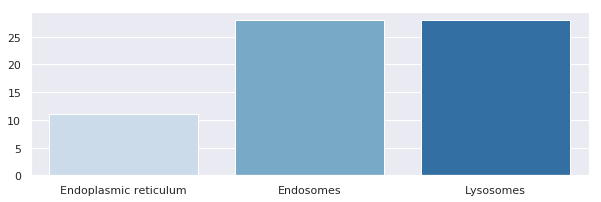

In [24]:
lyso_endo_counts = find_counts("Lysosomes", train_labels)

plt.figure(figsize=(10,3))
sns.barplot(x=lyso_endo_counts.index.values, y=lyso_endo_counts.values, palette="Blues")

### Endosomes

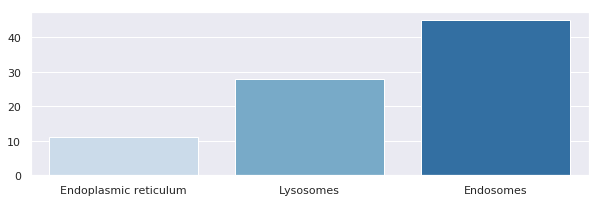

In [26]:
lyso_endo_counts = find_counts("Endosomes", train_labels)

plt.figure(figsize=(10,3))
sns.barplot(x=lyso_endo_counts.index.values, y=lyso_endo_counts.values, palette="Blues")

### Rods and rings

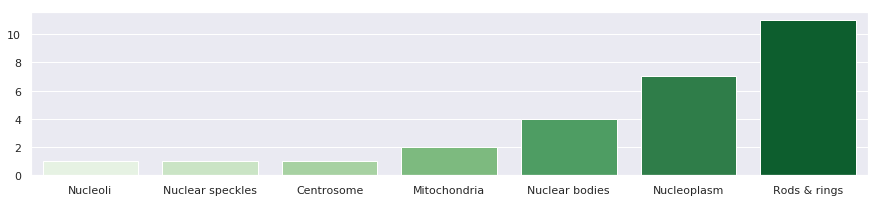

In [27]:
rod_rings_counts = find_counts("Rods & rings", train_labels)
plt.figure(figsize=(15,3))
sns.barplot(x=rod_rings_counts.index.values, y=rod_rings_counts.values, palette="Greens")

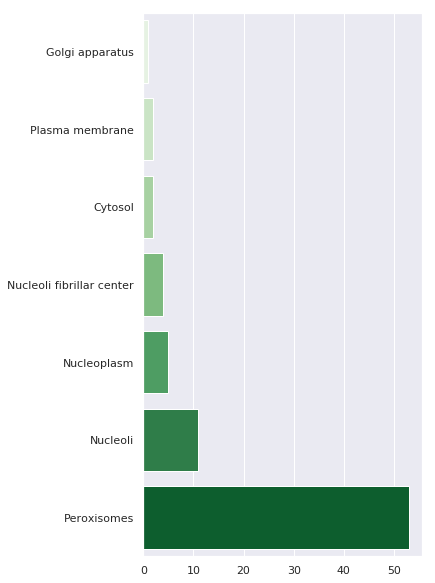

In [34]:
Endop_counts = find_counts("Peroxisomes", train_labels)
plt.figure(figsize=(5,10))
sns.barplot(y=Endop_counts.index.values, x=Endop_counts.values, palette="Greens")